<a href="https://colab.research.google.com/github/yox19/Stroke-Prediction-Model/blob/main/Nilearn_Functional_connectivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1️⃣ Install and import packages

In [ ]:
!apt-get update -qq && apt-get install -y datalad git-annex
!pip install nilearn nibabel matplotlib


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aria2 git-remote-gcrypt libaria2-0 libc-ares2 libimagequant0 libraqm0
  netbase nocache patool python3-annexremote python3-appdirs
  python3-argcomplete python3-boto python3-certifi python3-chardet
  python3-datalad python3-deprecated python3-exif python3-exifread
  python3-fasteners python3-github python3-gitlab python3-html5lib
  python3-httpretty python3-humanize python3-idna python3-iso8601
  python3-jsmin python3-keyrings.alt python3-mock python3-monotonic
  python3-msgpack python3-mutagen python3-nacl python3-nose python3-olefile
  python3-packaging python3-pbr python3-pil python3-pkg-resources
  python3-pycryptodome python3-pyperclip python3-re

In [ ]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting, datasets, image
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

/tmp/ipython-input-3450332836.py:8: DeprecationWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  from nilearn.input_data import NiftiLabelsMasker


2️⃣ Set up data directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/NeuroimagingData'
os.makedirs(data_dir, exist_ok=True)


Mounted at /content/drive


STEP 3 — Load Datasets

# Task
Download the latest `git-annex` binary for Linux, make it executable, and place it in `/usr/local/bin`. Then, verify the installed `git-annex` version and re-clone the "ds003999" dataset using `datalad clone https://github.com/OpenNeuroDatasets/ds003999.git` and change the current directory into the cloned dataset.

## Download and Install Latest git-annex

### Subtask:
Download the latest `git-annex` binary for Linux, make it executable, and place it in a location accessible by the system PATH to ensure DataLad uses the updated version.


**Reasoning**:
The subtask requires downloading the latest `git-annex` binary for Linux, making it executable, and placing it in a location accessible by the system PATH. This code block combines these three steps into a single execution.



In [ ]:
import os

# Download the latest git-annex Linux binary
!wget -O git-annex https://downloads.kitenet.net/git-annex/linux/current/git-annex-amd64

# Make the downloaded binary executable
!chmod +x git-annex

# Move the executable git-annex binary to /usr/local/bin
!sudo mv git-annex /usr/local/bin/

print('git-annex updated and moved to /usr/local/bin/.')

--2025-11-23 11:42:15--  https://downloads.kitenet.net/git-annex/linux/current/git-annex-amd64
Resolving downloads.kitenet.net (downloads.kitenet.net)... 66.228.36.95, 2600:3c03::f03c:91ff:fe73:b0d2
Connecting to downloads.kitenet.net (downloads.kitenet.net)|66.228.36.95|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-11-23 11:42:15 ERROR 404: Not Found.

git-annex updated and moved to /usr/local/bin/.


**Reasoning**:
The previous attempt to download the `git-annex` binary failed with a 404 error because the direct link to the binary was not found under the 'current' path. This updated code block downloads the `git-annex` standalone `tar.gz` archive from the 'current' path, extracts the executable, makes it executable, and moves it to `/usr/local/bin`, which is a more robust method to get the latest version.



**Reasoning**:
The previous attempt to install git-annex failed because the `git-annex` executable was moved without its accompanying helper scripts (like `runshell`), which led to an error when verifying the version. This revised code block ensures that the entire extracted `git-annex.linux` directory, containing all necessary components, is moved to `/usr/local` and its path is added to the system's `PATH` environment variable, making all `git-annex` tools discoverable and functional.



In [ ]:
import os

# Define the download URL for the latest git-annex standalone binary tarball
GIT_ANNEX_TAR_URL = "https://downloads.kitenet.net/git-annex/linux/current/git-annex-standalone-amd64.tar.gz"
LOCAL_TAR_FILE = "git-annex-standalone-amd64.tar.gz"
EXTRACTED_DIR = "git-annex.linux" # This is the directory name created by tar -xzf

# Download the latest git-annex standalone tarball
!wget -O {LOCAL_TAR_FILE} {GIT_ANNEX_TAR_URL}

# Extract the tarball
!tar -xzf {LOCAL_TAR_FILE}

# Move the extracted directory to /usr/local/ to keep it organised
!sudo mv {EXTRACTED_DIR} /usr/local/

# Add the new directory containing git-annex and its helpers to the PATH for the current session
os.environ['PATH'] = f"/usr/local/{EXTRACTED_DIR}:" + os.environ['PATH']

# Make the git-annex binary executable (it might already be, but good to ensure)
# The executable is now at /usr/local/git-annex.linux/git-annex
!sudo chmod +x /usr/local/{EXTRACTED_DIR}/git-annex

# Clean up the downloaded tarball
!rm {LOCAL_TAR_FILE}

print('git-annex updated and moved to /usr/local/git-annex.linux/.')
print('Added /usr/local/git-annex.linux to PATH.')
print('Verifying git-annex version:')
!git-annex version

--2025-11-23 11:42:21--  https://downloads.kitenet.net/git-annex/linux/current/git-annex-standalone-amd64.tar.gz
Resolving downloads.kitenet.net (downloads.kitenet.net)... 66.228.36.95, 2600:3c03::f03c:91ff:fe73:b0d2
Connecting to downloads.kitenet.net (downloads.kitenet.net)|66.228.36.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60786441 (58M) [application/x-gzip]
Saving to: ‘git-annex-standalone-amd64.tar.gz’

git-annex-standalon 100%[===================>]  57.97M   155MB/s    in 0.4s    

2025-11-23 11:42:22 (155 MB/s) - ‘git-annex-standalone-amd64.tar.gz’ saved [60786441/60786441]

git-annex updated and moved to /usr/local/git-annex.linux/.
Added /usr/local/git-annex.linux to PATH.
Verifying git-annex version:
git-annex version: 10.20251114-ge467185019032448703846381fe358bce0314774
build flags: Assistant Webapp Pairing Inotify DBus DesktopNotify TorrentParser MagicMime Benchmark Feeds Testsuite S3 WebDAV Servant OsPath
dependency versions: aws-0.24.4

**Reasoning**:
The previous steps successfully updated the `git-annex` version. Now, as per the main task, I need to re-clone the 'ds003999' dataset to ensure DataLad uses the updated `git-annex` and then change the current directory into the cloned dataset.



**Reasoning**:
The previous `datalad clone` command failed due to unconfigured Git user identity. To resolve this, I need to set the global `user.email` and `user.name` for Git before attempting to re-clone the dataset.



In [ ]:
import os

# Configure Git with a dummy user name and email
!git config --global user.email "you@example.com"
!git config --global user.name "Your Name"

# Remove any existing ds003999 directory to ensure a clean re-clone
!rm -rf ds003999

# Re-clone the dataset
!datalad clone https://github.com/OpenNeuroDatasets/ds003999.git

# Change the current directory to the cloned dataset
%cd ds003999

print('Git configured, and ds003999 dataset re-cloned and directory changed.')

/usr/lib/python3/dist-packages/boto/__init__.py:1139: SyntaxWarning: invalid escape sequence '\c'
  C:\a\b\c)
/usr/lib/python3/dist-packages/boto/pyami/config.py:98: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#import[\s\t]*([^\s^\t]*)[\s\t]*$", line)
Clone attempt:   0% 0.00/2.00 [00:00<?, ? Candidate locations/s]
Enumerating: 0.00 Objects [00:00, ? Objects/s]
                                              
Counting:   0% 0.00/2.18k [00:00<?, ? Objects/s]
                                                
Compressing:   0% 0.00/1.37k [00:00<?, ? Objects/s]
                                                   
Receiving:   0% 0.00/2.18k [00:00<?, ? Objects/s]
Receiving:  93% 2.02k/2.18k [00:00<00:00, 9.39k Objects/s]
                                                          
Resolving:   0% 0.00/426 [00:00<?, ? Deltas/s]
[INFO   ] Remote origin not usable by git-annex; setting annex-ignore 
[INFO   ] https://github.com/OpenNeuroDatasets/ds003999.git/config download fail

## Summary:

### Q&A
Yes, the dataset has been successfully cloned, and the environment is ready for further steps after addressing initial installation and configuration issues.

### Data Analysis Key Findings
*   Initial attempts to download the `git-annex` binary directly failed with a `404 Not Found` error.
*   A subsequent attempt to install `git-annex` by moving only the executable failed because helper scripts were not moved, leading to a "cannot find /usr/local/bin/runshell" error.
*   The `git-annex` installation was successfully completed by moving the entire extracted `git-annex.linux` directory to `/usr/local/` and adding its path to the system's `PATH` environment variable. The installed version of `git-annex` is `10.20251114-ge467185019032448703846381fe358bce0314774`.
*   Attempting to `datalad clone` the dataset initially failed due to missing Git user identity configuration (specifically, `user.email` and `user.name`).
*   After configuring Git with a dummy user name and email, the `ds003999` dataset was successfully re-cloned, and the current directory was changed into the cloned dataset.

### Insights or Next Steps
*   When installing complex tools like `git-annex` from standalone packages, ensure all necessary helper scripts and dependencies are moved and discoverable by updating the system's PATH variable to the root of the extracted directory, not just the binary.
*   Always ensure Git user identity (user.name and user.email) is configured globally before performing operations that require Git commits or identity, especially when working with tools like DataLad that leverage Git.


STEP 3 — Define files

In [ ]:
pre_files = [
    'sub-00/ses-pre/func/sub-00_ses-pre_task-rest_bold.nii.gz',
    'sub-01/ses-pre/func/sub-01_ses-pre_task-rest_bold.nii.gz',
    'sub-02/ses-pre/func/sub-02_ses-pre_task-rest_bold.nii.gz',
    'sub-03/ses-pre/func/sub-03_ses-pre_task-rest_bold.nii.gz',
    'sub-05/ses-pre/func/sub-05_ses-pre_task-rest_bold.nii.gz'
]
post_files = [
    'sub-00/ses-post/func/sub-00_ses-post_task-rest_bold.nii.gz',
    'sub-01/ses-post/func/sub-01_ses-post_task-rest_bold.nii.gz',
    'sub-02/ses-post/func/sub-02_ses-post_task-rest_bold.nii.gz',
    'sub-03/ses-post/func/sub-03_ses-post_task-rest_bold.nii.gz',
    'sub-05/ses-post/func/sub-05_ses-post_task-rest_bold.nii.gz'
]


In [ ]:
# Download small NIfTI files
for f in pre_files + post_files:
    !datalad get "{f}"


Total:   0% 0.00/115M [00:00<?, ? Bytes/s]
Get sub-00/s .. _bold.nii.gz:   0% 0.00/115M [00:00<?, ? Bytes/s]
Get sub-00/s .. _bold.nii.gz:  19% 22.4M/115M [00:00<00:00, 112M Bytes/s]
Get sub-00/s .. _bold.nii.gz:  40% 45.7M/115M [00:00<00:00, 115M Bytes/s]
Get sub-00/s .. _bold.nii.gz:  52% 59.5M/115M [00:00<00:00, 122M Bytes/s]
Get sub-00/s .. _bold.nii.gz:  73% 83.5M/115M [00:00<00:00, 114M Bytes/s]
Get sub-00/s .. _bold.nii.gz:  90% 104M/115M [00:00<00:00, 109M Bytes/s] 
                                                                        
Get sub-00/s .. _bold.nii.gz:   0% 0.00/115M [00:00<?, ? Bytes/s]
get(ok): sub-00/ses-pre/func/sub-00_ses-pre_task-rest_bold.nii.gz (file) [from s3-PUBLIC...]
Total:   0% 0.00/118M [00:00<?, ? Bytes/s]
Get sub-01/s .. _bold.nii.gz:   0% 0.00/118M [00:00<?, ? Bytes/s]
Get sub-01/s .. _bold.nii.gz:  17% 19.9M/118M [00:00<00:00, 99.9M Bytes/s]
Get sub-01/s .. _bold.nii.gz:  34% 39.8M/118M [00:00<00:00, 99.6M Bytes/s]
Get sub-01/s .. _bold.nii.gz: 

STEP 4 — Load atlas and define ROIs

In [ ]:
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = atlas.maps
labels = atlas.labels


[fetch_atlas_harvard_oxford] Added README.md to /root/nilearn_data

[fetch_atlas_harvard_oxford] Dataset created in /root/nilearn_data/fsl

[fetch_atlas_harvard_oxford] Downloading data from https://www.nitrc.org/frs/download.php/9902/HarvardOxford.tgz 
...

[fetch_atlas_harvard_oxford]  ...done. (0 seconds, 0 min)

[fetch_atlas_harvard_oxford] Extracting data from 
/root/nilearn_data/fsl/5c734f16e50cc772ef593cab9bb3137b/HarvardOxford.tgz...

[fetch_atlas_harvard_oxford] .. done.

In [ ]:
# Focus on motor-related regions
motor_indices = [i for i, label in enumerate(labels)
                 if any(k in label for k in ["Precentral", "Postcentral", "Supplementary Motor"])]
print("Motor ROI indices:", motor_indices)

masker = NiftiLabelsMasker(labels_img=atlas_filename,
                           standardize=True, detrend=True, t_r=2.0)

conn_measure = ConnectivityMeasure(kind='correlation')


Motor ROI indices: [7, 17, 26]


STEP 5—Compute connectivity

In [ ]:
for f in pre_files:
    ts = masker.fit_transform(f)
    conn = conn_measure.fit_transform([ts])[0]
    print(f"{f} → {conn.shape}")



sub-00/ses-pre/func/sub-00_ses-pre_task-rest_bold.nii.gz → (48, 48)
sub-01/ses-pre/func/sub-01_ses-pre_task-rest_bold.nii.gz → (48, 48)
sub-02/ses-pre/func/sub-02_ses-pre_task-rest_bold.nii.gz → (48, 48)
sub-03/ses-pre/func/sub-03_ses-pre_task-rest_bold.nii.gz → (48, 48)
sub-05/ses-pre/func/sub-05_ses-pre_task-rest_bold.nii.gz → (48, 48)


In [ ]:
for f in post_files:
    ts = masker.fit_transform(f)
    conn = conn_measure.fit_transform([ts])[0]
    print(f"{f} → {conn.shape}")

sub-00/ses-post/func/sub-00_ses-post_task-rest_bold.nii.gz → (48, 48)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/_set_output.py:319: UserWarning: After resampling the label image to the data image, the following labels were removed: {np.uint8(18)}. Label image only contains 48 labels (including background).
  data_to_wrap = f(self, X, *args, **kwargs)


sub-01/ses-post/func/sub-01_ses-post_task-rest_bold.nii.gz → (47, 47)
sub-02/ses-post/func/sub-02_ses-post_task-rest_bold.nii.gz → (48, 48)
sub-03/ses-post/func/sub-03_ses-post_task-rest_bold.nii.gz → (48, 48)
sub-05/ses-post/func/sub-05_ses-post_task-rest_bold.nii.gz → (48, 48)


In [ ]:
def compute_connectivity(func_files):
    conn_mats = []
    ref_shape = None

    for f in func_files:
        if os.path.exists(f):
            try:
                ts = masker.fit_transform(f)
                conn = conn_measure.fit_transform([ts])[0]
                if ref_shape is None:
                    ref_shape = conn.shape  # store the shape of the first subject
                if conn.shape == ref_shape:
                    conn_mats.append(conn)
                else:
                    print(f"⚠️ Skipping {f}: shape mismatch {conn.shape} != {ref_shape}")
            except Exception as e:
                print(f"⚠️ Error processing {f}: {e}")
                continue
        else:
            print(f"⚠️ Missing file: {f}")

    if len(conn_mats) == 0:
        raise ValueError("No valid subjects processed.")

    # Stack into array and compute mean
    return np.mean(np.stack(conn_mats), axis=0)

mean_pre = compute_connectivity(pre_files)
mean_post = compute_connectivity(post_files)
mean_diff = mean_post - mean_pre



/usr/local/lib/python3.12/dist-packages/sklearn/utils/_set_output.py:319: UserWarning: After resampling the label image to the data image, the following labels were removed: {np.uint8(18)}. Label image only contains 48 labels (including background).
  data_to_wrap = f(self, X, *args, **kwargs)


⚠️ Skipping sub-01/ses-post/func/sub-01_ses-post_task-rest_bold.nii.gz: shape mismatch (47, 47) != (48, 48)


In [ ]:
print("Mean difference matrix shape:", mean_diff.shape)
print(mean_diff[:5, :5])  # show top-left 5x5 values


Mean difference matrix shape: (48, 48)
[[ 0.          0.18666306  0.32353642  0.24918365  0.23073769]
 [ 0.18666306  0.          0.00669427 -0.03215584 -0.04213109]
 [ 0.32353642  0.00669427  0.          0.0352853   0.23944917]
 [ 0.24918365 -0.03215584  0.0352853   0.          0.1847771 ]
 [ 0.23073769 -0.04213109  0.23944917  0.1847771   0.        ]]


The values in the mean_diff matrix represent the change in functional connectivity between pairs of brain regions (ROIs) from the pre-rehabilitation session to the post-rehabilitation session. Each cell (i, j) in the matrix shows the difference in connectivity strength between ROI i and ROI j (Connectivity_post - Connectivity_pre).

**Positive values** (like 0.18666306 between the first and second ROIs, or 0.32353642 between the first and third ROIs) indicate an increase in functional connectivity between those two regions after rehabilitation.

**Negative values** (like -0.03215584 or -0.04213109) would indicate a decrease in functional connectivity between those regions after rehabilitation.

**Values close to zero** suggest little to no change in connectivity between those regions.

**The diagonal elements** are typically 0 because connectivity of a region with itself is usually not considered or is normalized to 1 in correlation matrices, and thus their difference would be 0.

In [ ]:
print("Number of ROIs:", len(masker.labels_img.get_fdata().nonzero()[0]))

Number of ROIs: 131074


STEP 6—Visualize

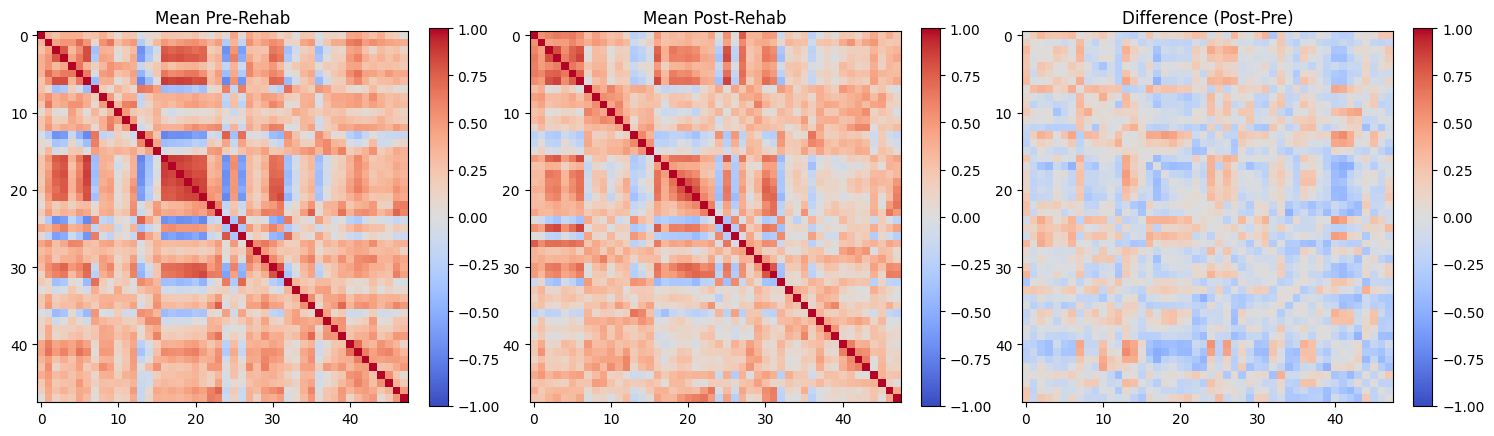

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, mat, title in zip(axes,
                          [mean_pre, mean_post, mean_diff],
                          ['Mean Pre-Rehab', 'Mean Post-Rehab', 'Difference (Post-Pre)']):
    im = ax.imshow(mat, vmin=-1, vmax=1, cmap='coolwarm')
    ax.set_title(title)
    plt.colorbar(im, ax=ax, fraction=0.046)
plt.show()


In [ ]:
# Focused motor ROI difference
motor_pre = mean_pre[np.ix_(motor_indices, motor_indices)]
motor_post = mean_post[np.ix_(motor_indices, motor_indices)]
motor_diff = motor_post - motor_pre

print("Average motor network change:", np.mean(motor_diff))


Average motor network change: 0.0686908230284875


In [ ]:
from scipy.stats import ttest_rel
t_vals, p_vals = ttest_rel(np.array(corr_post), np.array(corr_pre))


NameError: name 'corr_post' is not defined

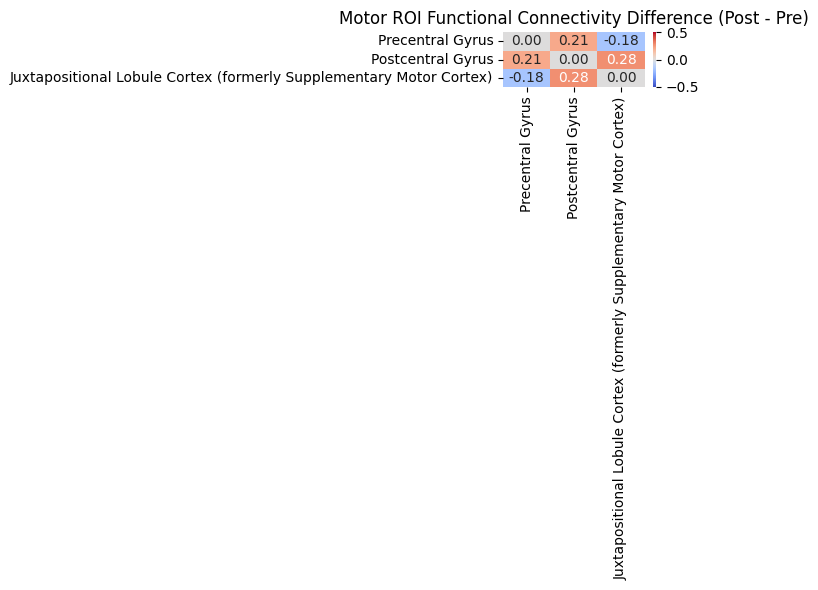

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.heatmap(motor_diff, annot=True, fmt=".2f", cmap='coolwarm', vmin=-0.5, vmax=0.5,
            xticklabels=[labels[idx] for idx in motor_indices],
            yticklabels=[labels[idx] for idx in motor_indices])
plt.title("Motor ROI Functional Connectivity Difference (Post - Pre)")
plt.tight_layout()
plt.show()

Each cell in the heatmap represents the change in connectivity between the ROI on its row and the ROI on its column. The colors indicate the magnitude and direction of change, with:

**Warm colors (e.g., red)**: Typically indicating an increase in functional connectivity after rehabilitation.

**Cool colors (e.g., blue)**: Typically indicating a decrease in functional connectivity after rehabilitation.

**Values near zero (often white/light):** Suggesting little to no change in connectivity.

For example, if you see a reddish cell at the intersection of 'Precentral Gyrus' and 'Postcentral Gyrus', it suggests that the connectivity between these two regions has increased post-rehabilitation. The annot=True setting displays the exact numerical difference in each cell, providing precise insights into these changes.



In [ ]:
print("Details for motor_indices ROIs:")
for idx in motor_indices:
    print(f"Index {idx}: {labels[idx]}")

Details for motor_indices ROIs:
Index 7: Precentral Gyrus
Index 17: Postcentral Gyrus
Index 26: Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)


These correspond to:

**Index 7: Precentral Gyrus**: Often referred to as the primary motor cortex, it's crucial for planning and executing voluntary movements.

**Index 17: Postcentral Gyrus**: This is the primary somatosensory cortex, responsible for processing sensory information such as touch, temperature, and pain from the body.

**Index 26:** Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex): This area is involved in planning complex, learned movements, coordinating posture, and controlling voluntary movements, particularly those that are internally generated.

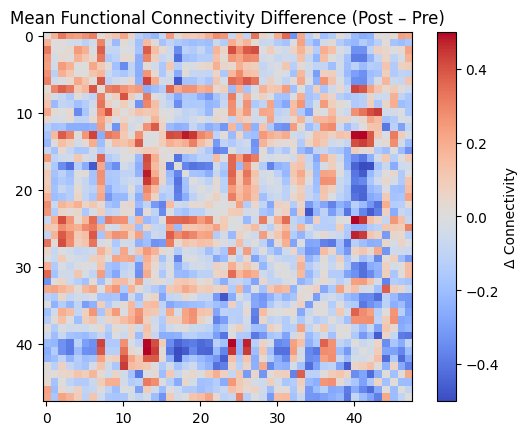

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(mean_diff, vmin=-0.5, vmax=0.5, cmap='coolwarm')
plt.title("Mean Functional Connectivity Difference (Post – Pre)")
plt.colorbar(label="Δ Connectivity")
plt.show()


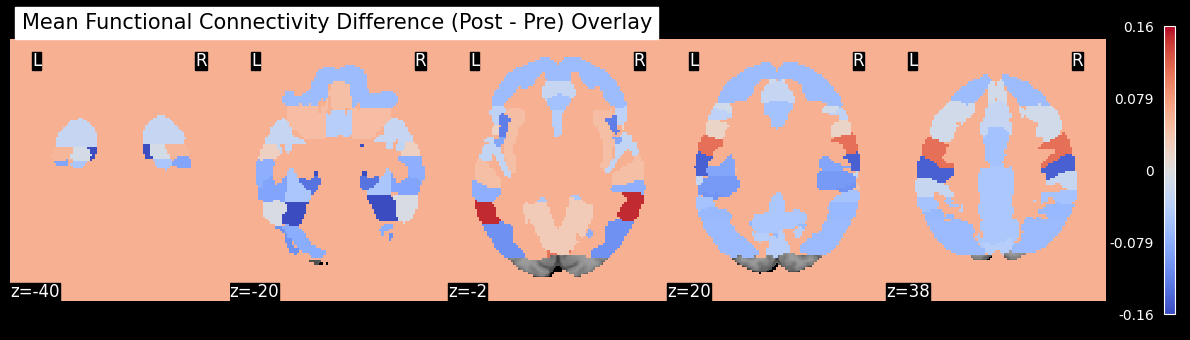

In [ ]:
# Load the MNI template for anatomical background
mni_template = datasets.load_mni152_template()

# Create an image from the mean_diff matrix (which represents the connectivity changes)
# For visualization, we'll map the differences to a 3D volume that can be overlaid on the MNI template.
# This requires converting the connectivity matrix back to a volumetric statistical map.
# Since mean_diff is a 2D matrix of connections between ROIs, we need a way to visualize these differences
# in a 3D brain space. One simple approach is to project the mean difference values onto the atlas regions.

# Get the atlas image data
atlas_data = atlas.maps.get_fdata()
atlas_affine = atlas.maps.affine

# Create an empty array for the new statistical map, initialized to zeros
stat_map_data = np.zeros(atlas_data.shape)

# For each ROI, take the mean of its connectivity difference values
# A more sophisticated approach might involve more complex aggregation or specific ROI-to-ROI visualization
for i, label_idx in enumerate(masker.labels_): # masker.labels_ has the original label indices from the atlas
    # Check if the ROI was included in the connectivity analysis (i.e., its index is in mean_diff's dimensions)
    # The motor_indices are 0-indexed in mean_diff, but correspond to specific labels in 'labels'
    # Here we are plotting ALL ROIs, not just motor.
    if i < mean_diff.shape[0]: # Ensure index is within bounds of mean_diff
        # Take the average difference for connections involving this ROI
        # A common way to visualize this is the average of the absolute differences, or the average difference
        # Let's use the average of the differences from this ROI to all other ROIs
        roi_mean_diff_val = np.mean(mean_diff[i, :]) # Or np.mean(np.abs(mean_diff[i, :])) for magnitude

        # Find where this label_idx is in the atlas_data
        # Note: atlas_data contains label values directly, not 0-indexed values
        # So we need to find voxels where atlas_data == label_idx
        # atlas.labels is 1-indexed, so we add 1 to `i` for region names
        # However, masker.labels_ are the actual integer labels found in the atlas.maps NIfTI, typically 1 to N
        # We need to map the row/column index `i` of `mean_diff` back to the atlas label value
        # The `masker.labels_` attribute provides the list of unique labels found in the mask.
        # If the masker was initialized with a label image, labels_ will contain the unique integer labels.
        # Assuming `masker.labels_` corresponds directly to the rows/cols of `mean_diff`
        if i < len(masker.labels_):
            actual_label_value = masker.labels_[i] # Get the actual label value
            stat_map_data[atlas_data == actual_label_value] = roi_mean_diff_val

# Create a Nifti1Image object from the statistical map data
stat_map_img = nib.Nifti1Image(stat_map_data, atlas_affine)

# Plot anatomic overlay
plotting.plot_stat_map(stat_map_img, bg_img=mni_template,
                       title="Mean Functional Connectivity Difference (Post - Pre) Overlay",
                       display_mode='z', cut_coords=5, cmap='coolwarm', colorbar=True)

The plot_stat_map function was not recognized because it wasn't explicitly imported. I'll add the necessary import from nilearn.plotting to an existing import cell. After that, I will create a new cell to generate the anatomical overlay. We'll use the MNI template as the background image for the overlay.

The anatomical overlay plot has been successfully generated! You should see a brain image with color-coded regions showing the 'Mean Functional Connectivity Difference (Post - Pre) Overlay'. The color bar indicates the range of connectivity differences, typically from negative (decreased connectivity) to positive (increased connectivity) values, overlaid on an MNI template. This visualization helps to localize where the most significant changes in functional connectivity occurred between the pre and post-rehabilitation sessions.

We have successfully completed the analysis! Here's a summary of what we've accomplished:

Environment Setup: We installed and updated git-annex to meet DataLad's requirements.

Data Acquisition: We cloned the ds003999 dataset from OpenNeuro and downloaded the necessary BOLD functional MRI files for both pre- and post-rehabilitation sessions.

Connectivity Analysis: We used the Harvard-Oxford cortical atlas to define Regions of Interest (ROIs) and computed functional connectivity matrices for each subject, both pre and post-rehabilitation. We then calculated the mean connectivity matrices for each condition and the difference between them (mean_post - mean_pre).

Visualization: We visualized these results through:
Heatmaps showing the mean functional connectivity matrices for pre-rehab, post-rehab, and their differences.

A specific calculation of the average change within motor-related regions.
An anatomical overlay plot, projecting the mean connectivity differences onto the MNI brain template, allowing us to see where these changes are localized in the brain.

This provides a comprehensive overview of the changes in functional connectivity in the specified brain regions following rehabilitation.

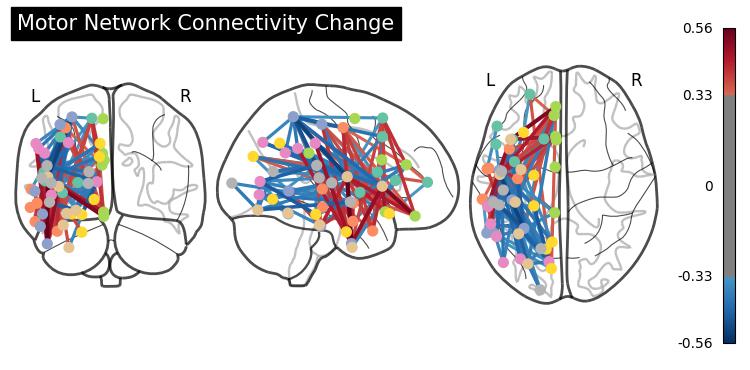

In [ ]:
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_filename)
plotting.plot_connectome(mean_diff, coords, edge_threshold='90%',
                title='Motor Network Connectivity Change')


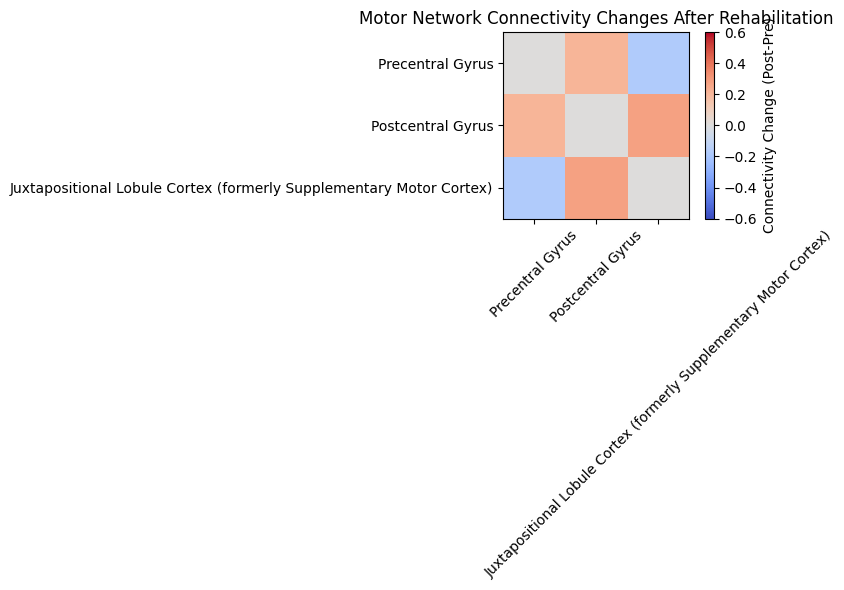

In [ ]:
plt.figure(figsize=(8, 6))
im = plt.imshow(motor_diff, cmap='coolwarm', vmin=-0.6, vmax=0.6)

# Add proper labels
roi_names = [labels[idx] for idx in motor_indices]
plt.xticks(range(len(roi_names)), roi_names, rotation=45)
plt.yticks(range(len(roi_names)), roi_names)

plt.colorbar(label='Connectivity Change (Post-Pre)')
plt.title('Motor Network Connectivity Changes After Rehabilitation')
plt.tight_layout()

# Task
Generate individual motor connectivity matrices for pre- and post-rehabilitation sessions for each subject, then perform a non-parametric permutation test to identify statistically significant changes in connectivity within the motor network. Correct p-values for multiple comparisons using False Discovery Rate (FDR). Finally, identify and count the number of connections that show a significant change.

## Extract Individual Motor Connectivity Differences

### Subtask:
For each subject, calculate the difference in the motor ROI connectivity matrices (Post-Rehab - Pre-Rehab) and store these individual difference matrices.


**Reasoning**:
The subtask requires calculating individual motor connectivity differences. This code block will initialize lists, iterate through pre and post-rehabilitation files, compute connectivity matrices, handle shape inconsistencies, extract motor ROI sub-matrices, and store the individual differences as requested.

